In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Importing data

orders = pd.read_csv('orders.csv' )
order_products_train = pd.read_csv('order_products__train.csv')
order_products_prior = pd.read_csv('order_products__prior.csv')
products = pd.read_csv('products.csv')
aisles = pd.read_csv('aisles.csv')
departments = pd.read_csv('departments.csv')

In [75]:
orders.head()

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2539329,1,prior,1,2,8,NaN
1,2398795,1,prior,2,3,7,15.0
2,473747,1,prior,3,3,12,21.0
3,2254736,1,prior,4,4,7,29.0
4,431534,1,prior,5,4,15,28.0


In [76]:
order_products_train.head()

,order_id,product_id,add_to_cart_order,reordered
0,1,49302,1,1
1,1,11109,2,1
2,1,10246,3,0
3,1,49683,4,0
4,1,43633,5,1


In [77]:
order_products_prior.head()

,order_id,product_id,add_to_cart_order,reordered
0,2,33120,1,1
1,2,28985,2,1
2,2,9327,3,0
3,2,45918,4,1
4,2,30035,5,0


In [78]:
products.head()

,product_id,product_name,aisle_id,department_id
0,1,Chocolate Sandwich Cookies,61,19
1,2,All-Seasons Salt,104,13
2,3,Robust Golden Unsweetened Oolong Tea,94,7
3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,38,1
4,5,Green Chile Anytime Sauce,5,13


In [79]:
aisles.head()

,aisle_id,aisle
0,1,prepared soups salads
1,2,specialty cheeses
2,3,energy granola bars
3,4,instant foods
4,5,marinades meat preparation


In [80]:
departments.head()

,department_id,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol


In [3]:
aisles['aisle'] = aisles['aisle'].astype('category')
departments['department'] = departments['department'].astype('category')
orders['eval_set'] = orders['eval_set'].astype('category')
products['product_name'] = products['product_name'].astype('category')

In [82]:
orders.shape

(3421083, 7)

In [83]:
order_products_train.shape

(1384617, 4)

In [84]:
order_products_prior.shape

(32434489, 4)

In [17]:
products.shape

(49688, 4)

In [18]:
aisles.shape

(134, 2)

In [19]:
departments.shape

(21, 2)

In [4]:
# Check for missing values

missing = pd.concat([orders.isnull().sum(), 100 * orders.isnull().mean()], axis=1)
missing.columns=['count', '%']
missing = missing.sort_values(by = ['count','%'], ascending = False)
missing

,count,%
days_since_prior_order,206209,6.027594
order_id,0,0.000000
user_id,0,0.000000
eval_set,0,0.000000
order_number,0,0.000000
order_dow,0,0.000000
order_hour_of_day,0,0.000000


In [25]:
# Orders dataframe is only dataset with missing/null values
#missing = pd.concat([departments.isnull().sum(), 100 * departments.isnull().mean()], axis=1)
#missing.columns=['count', '%']
#missing = missing.sort_values(by = ['count','%'], ascending = False)
#missing

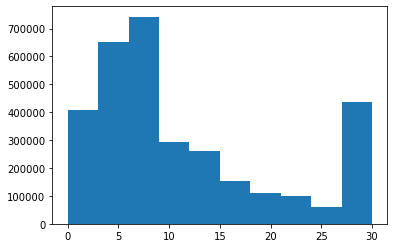

In [5]:
_ = plt.hist(orders['days_since_prior_order'])

# Maximum number of days since prior order is 30 days

In [6]:

#order_priors = orders.merge(order_products_prior, on='order_id', how='inner')

In [10]:
products_aisles = products.merge(aisles, on = 'aisle_id', how = 'left')

In [14]:
products_aisles = products_aisles.merge(departments, on = 'department_id', how = 'left')

In [17]:
order_product_aisles = order_products_prior.merge(products_aisles, on = 'product_id', how= 'left')

In [19]:
order_total = orders.merge(order_product_aisles, on = 'order_id',how = 'left')

In [20]:
order_total.head()

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,aisle,department
0,2539329,1,prior,1,2,8,NaN,196.0,1.0,0.0,Soda,77.0,7.0,soft drinks,beverages
1,2539329,1,prior,1,2,8,NaN,14084.0,2.0,0.0,Organic Unsweetened Vanilla Almond Milk,91.0,16.0,soy lactosefree,dairy eggs
2,2539329,1,prior,1,2,8,NaN,12427.0,3.0,0.0,Original Beef Jerky,23.0,19.0,popcorn jerky,snacks
3,2539329,1,prior,1,2,8,NaN,26088.0,4.0,0.0,Aged White Cheddar Popcorn,23.0,19.0,popcorn jerky,snacks
4,2539329,1,prior,1,2,8,NaN,26405.0,5.0,0.0,XL Pick-A-Size Paper Towel Rolls,54.0,17.0,paper goods,household


In [21]:
order_total['days_since_prior_order'] = order_total['days_since_prior_order'].fillna(order_total['days_since_prior_order'].median())

In [22]:
missing = pd.concat([order_total.isnull().sum(), 100 * order_total.isnull().mean()], axis=1)
missing.columns=['count', '%']
missing = missing.sort_values(by = ['count','%'], ascending = False)
missing

,count,%
product_id,206209,0.631754
add_to_cart_order,206209,0.631754
reordered,206209,0.631754
product_name,206209,0.631754
aisle_id,206209,0.631754
department_id,206209,0.631754
aisle,206209,0.631754
department,206209,0.631754
order_id,0,0.000000
user_id,0,0.000000


In [23]:
# Creating distinct groups for users

user = order_total.groupby('user_id')[['order_number']].max()
user.columns = ['u_total_orders']
user = user.reset_index()
user.head()

,user_id,u_total_orders
0,1,11
1,2,15
2,3,13
3,4,6
4,5,5


In [24]:
u_reorder = order_total.groupby('user_id')['reordered'].mean()
u_reorder = u_reorder.reset_index()
u_reorder.head()

,user_id,reordered
0,1,0.694915
1,2,0.476923
2,3,0.625000
3,4,0.055556
4,5,0.378378


In [93]:
user = user.merge(u_reorder, on='user_id', how='left')


In [94]:
user = user[['user_id','u_total_orders','reordered']]
user = user.rename(columns = {'reordered':'reordered_ratio'})
user.head()

,user_id,u_total_orders,reordered_ratio
0,1,10,0.694915
1,2,14,0.476923
2,3,12,0.625000
3,4,5,0.055556
4,5,4,0.378378


In [25]:
order_total.to_csv('order_final')